## **Image Classifier for Fruits Dataset - Team 4 Submission for SA4108 CA**
###Part 2: Convolutional Neural Network

---

## **Model 1: Handpicked Validation Data, Adam and RMSprop optimization algorithms; 200 x 200 px**

---



In [ ]:
import numpy as np
import sys

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image


In [ ]:
from zipfile import ZipFile
file_name = 'train.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done extracting train.zip')

Done extracting train.zip


In [ ]:
from zipfile import ZipFile
file_name = 'test.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done extracting test.zip')

Done extracting test.zip


In [ ]:
from zipfile import ZipFile
file_name = 'validation.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done extracting test.zip')

Done extracting test.zip


In [ ]:
from zipfile import ZipFile
file_name = 'test1.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done extracting test1.zip')

Done extracting test1.zip


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
import os 
import PIL

In [ ]:
img =image.load_img('train/apple/apple_1.jpg')

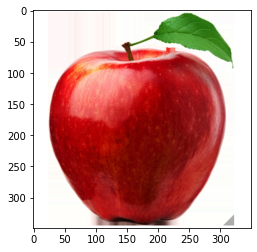

In [ ]:
plot.imshow(img)
cv2.imread("train/apple/apple_1.JPG")

#the only part that uses cv2 actually so cv2 isn't actually required 
#other than for the sole purpose of verification if the 

In [ ]:
train =  ImageDataGenerator(rescale =  1/255)
validation= ImageDataGenerator(rescale =  1/255)

In [ ]:
train_dataset= train.flow_from_directory("train/", 
                                         target_size = (200,200), 
                                         batch_size=10, 
                                         color_mode='rgb',
                                         class_mode ='categorical')

validation_dataset= validation.flow_from_directory("validation/", 
                                         target_size = (200,200), 
                                         batch_size=10, 
                                         color_mode='rgb',
                                         class_mode ='categorical')

Found 240 images belonging to 4 classes.
Found 56 images belonging to 4 classes.


In [ ]:
validation_dataset= validation.flow_from_directory("test1/", 
                                         target_size = (200,200), 
                                         batch_size=10, 
                                         color_mode='rgb',
                                         class_mode ='categorical')

Found 55 images belonging to 4 classes.


Making my model

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3), activation  ='relu', input_shape =(200,200,3)),
                                    tf.keras.layers.Conv2D(32,(3,3), activation  ='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation ="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(4,activation ="softmax")])

In [ ]:
model.compile (loss = "categorical_crossentropy",
              optimizer = Adam(learning_rate=0.001),
               metrics =['accuracy'])

#here we decided to try the Adam optimization algorithm,
#best accuracy of 85.5% is achieved, train time of ~624s, with ~21s an epoch and ~2s a step
#we also retrained the model, using data from the test set as for our validation model
#train time of ~685s, with 23s an epoch and ~2 a step
#result of last run of training the model was
#loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.7386e-05 - val_accuracy: 1.0000
#However, actual results translated only a result of 69.1% accuracy when putting the model to evaluate the test set


In [ ]:
model.compile (loss = "categorical_crossentropy",
              optimizer = RMSprop(learning_rate=0.001),
               metrics =['accuracy'])

#here we decided to try another optimization algorithm, which we found to yield a better accuracy overall
#best accuracy of 96.43% is achieved, train time of ~647s, ~23s an epoch and ~2s step
#actual results translated only a result of 92.7% accuracy when putting the model to evaluate the test set
#we also retrained the model, using data from the test set as for our validation model
#best accuracy of 92.73% is achieved, train time of ~720s, ~24s an epoch and ~2s step
#result of the last run of training the model is at epoch 3 where we stopped it as 100% accuracy is achieved
#loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.6429e-04 - val_accuracy: 1.0000
#actual accuracy of test set achieved is 92.7% when putting the model to the test



In [ ]:
model_fit =model.fit(train_dataset,
                 steps_per_epoch= 10,
                 epochs =30,
                validation_data=validation_dataset)

#we found that just running 10 steps per epoch and 30 epochs is sufficient to reach a high enough degree of accuracy
#upon observing an 100% accuracy and validation accurate, we terminated the training to save time

Epoch 1/30
 2/10 [=====>........................] - ETA: 16s - loss: 0.0028 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10/10 [==============================] - 24s 2s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 8.8485e-05 - val_accuracy: 1.0000
Epoch 2/30
10/10 [==============================] - 24s 2s/step - loss: 0.0244 - accuracy: 0.9900 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 3/30
10/10 [==============================] - 24s 2s/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.6429e-04 - val_accuracy: 1.0000
Epoch 4/30
 4/10 [===========>..................] - ETA: 12s - loss: 1.9507 - accuracy: 0.8500

KeyboardInterrupt: ignored

In [ ]:
validation_dataset.class_indices

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

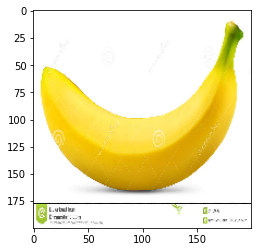

banana_79.jpg is banana


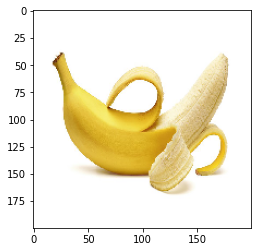

banana_82.jpg is banana


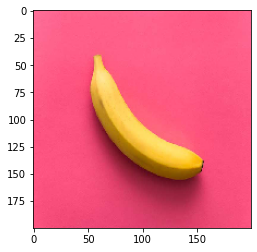

banana_88.jpg is apple


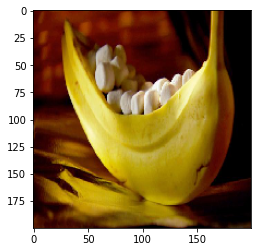

banana_83.jpg is orange


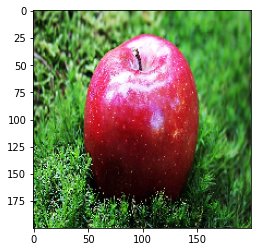

apple_91.jpg is apple


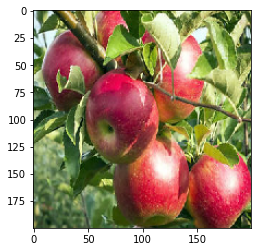

apple_77.jpg is orange


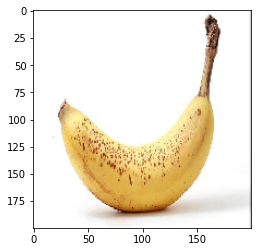

banana_84.jpg is banana


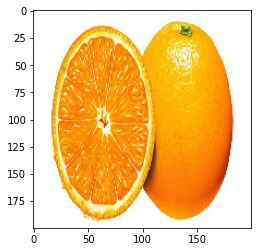

orange_78.jpg is orange


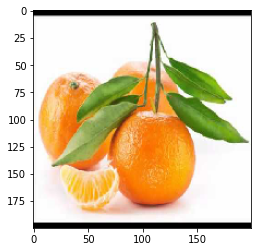

orange_86.jpg is orange


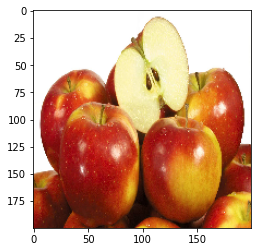

apple_95.jpg is apple


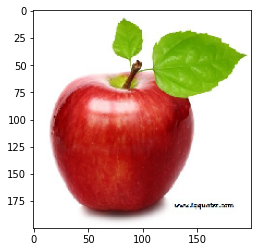

apple_87.jpg is apple


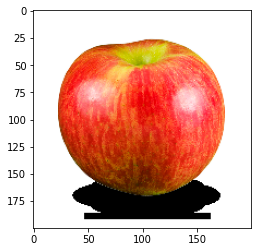

apple_92.jpg is apple


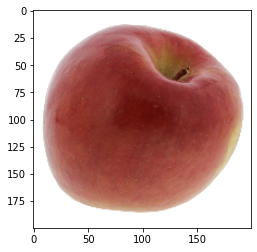

apple_90.jpg is apple


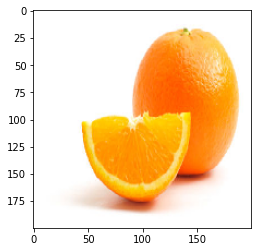

orange_92.jpg is orange


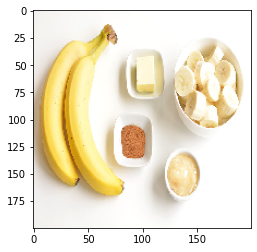

banana_91.jpg is banana


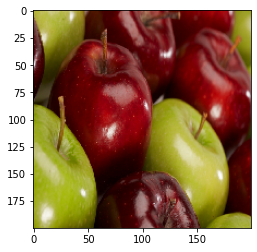

apple_84.jpg is apple


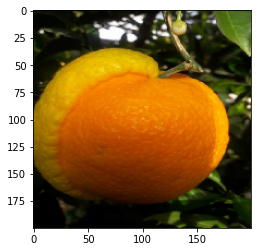

orange_85.jpg is orange


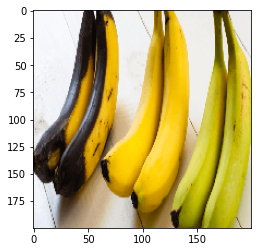

banana_87.jpg is banana


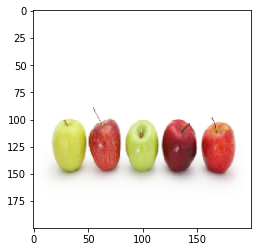

apple_86.jpg is apple


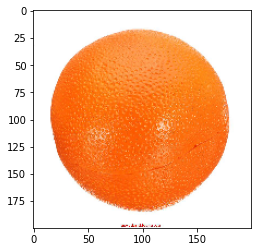

orange_83.jpg is orange


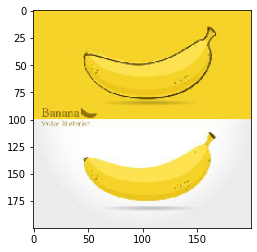

banana_93.jpg is banana


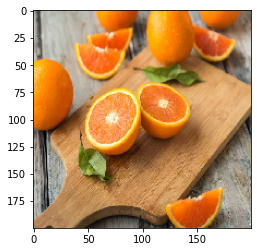

orange_77.jpg is orange


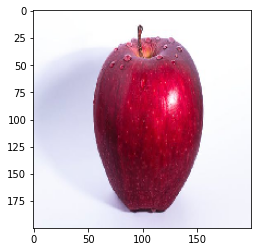

apple_93.jpg is apple


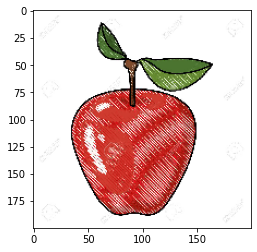

apple_88.jpg is apple


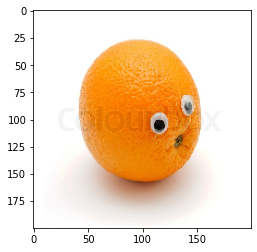

orange_91.jpg is orange


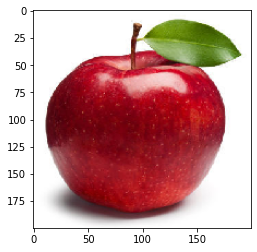

apple_89.jpg is apple


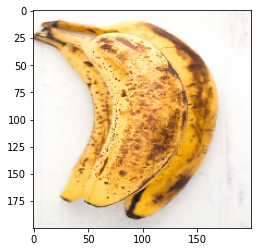

banana_86.jpg is banana


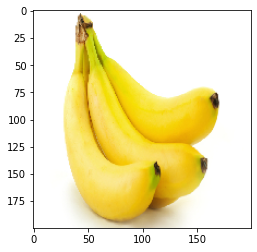

banana_90.jpg is banana


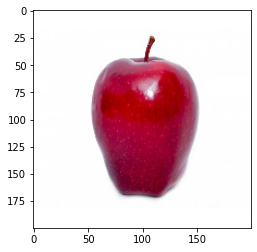

apple_80.jpg is apple


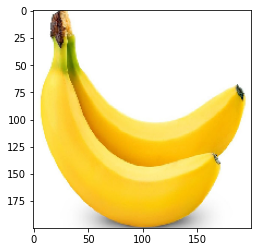

banana_81.jpg is banana


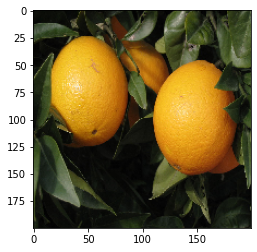

orange_89.jpg is orange


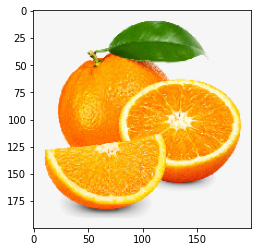

orange_82.jpg is orange


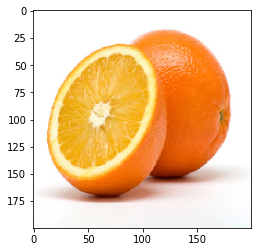

orange_84.jpg is orange


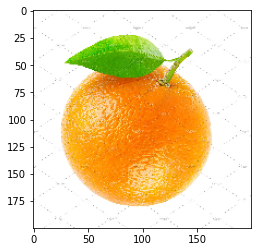

orange_95.jpg is orange


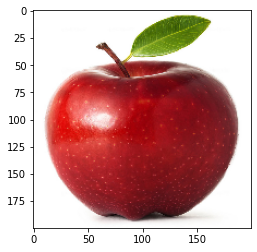

apple_81.jpg is apple


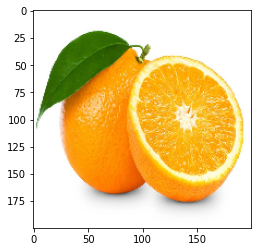

orange_80.jpg is orange


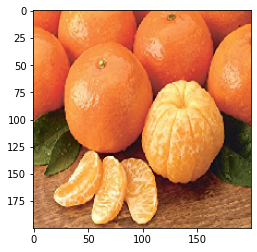

orange_90.jpg is orange


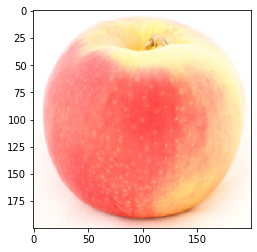

apple_78.jpg is apple


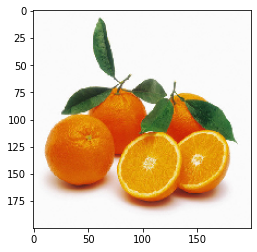

orange_87.jpg is orange


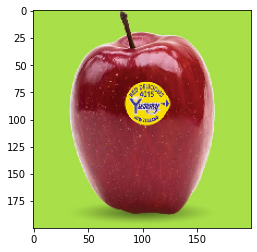

apple_85.jpg is apple


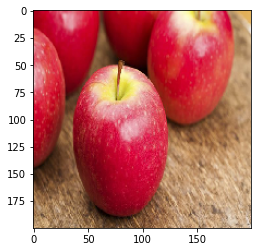

apple_94.jpg is apple


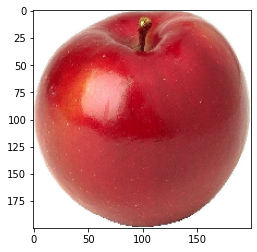

apple_83.jpg is apple


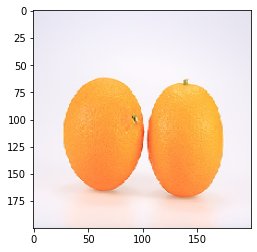

orange_93.jpg is orange


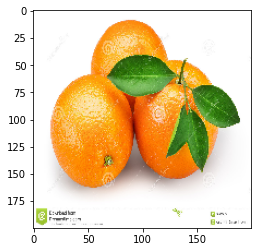

orange_81.jpg is orange


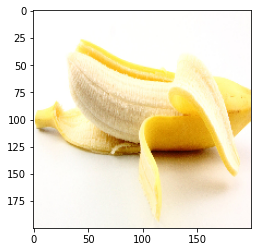

banana_85.jpg is banana


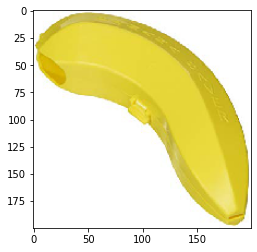

banana_94.jpg is banana


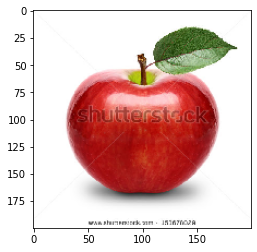

apple_82.jpg is apple


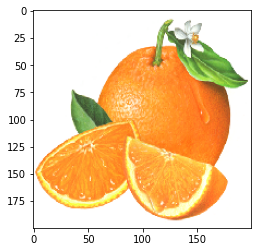

orange_94.jpg is orange


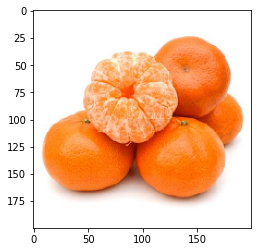

orange_79.jpg is orange


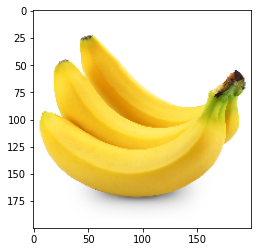

banana_89.jpg is orange


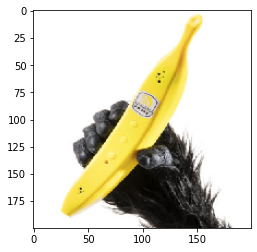

banana_77.jpg is banana


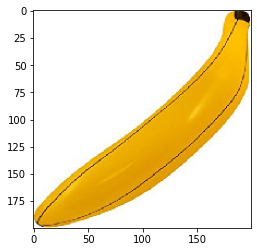

banana_92.jpg is banana


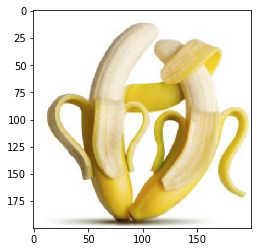

banana_78.jpg is banana


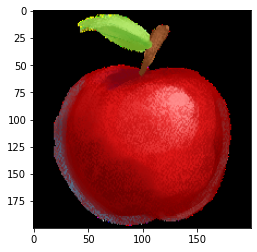

apple_79.jpg is apple


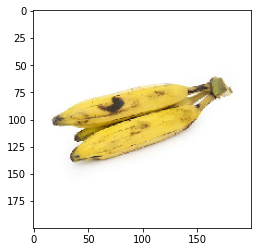

banana_80.jpg is banana
Accuracy of test set is 0.927


In [ ]:
dir_path= 'test/'

data = np.asarray(['apple','banana','mixed','orange'])
new_array= np.zeros((1,4))
#instantiates an empty numpy array
total = len(os.listdir(dir_path))
count = 0

for filename in os.listdir(dir_path):
    img = image.load_img(dir_path + filename, target_size=(200,200))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_batch)
    pred = prediction[0]
    
    idx, = np.where(pred==max(pred))
    #
    # Recording test set as 2D array
    new_array = np.vstack([new_array,pred])
    
    # Display + keep track of no. of correct predictions
    if len(idx) >1:
        plot.imshow(img)
        plot.show()
        print(f"{filename:s} is unknown by model, error in prediction")
    else:
        j = idx[0]
        plot.imshow(img)
        plot.show()
        print(f"{filename:s} is {data[j]}")
        if data[j] in filename:
            count += 1
        
print(f"Accuracy of test set is {count/total:0.3f}")
# print(new_array)

## **Model 2a: Adam and RMSprop optimization algorithms; 30 x 30 px**

---



In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [ ]:
from zipfile import ZipFile
file_name = 'train1.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done extracting train1.zip')

Done extracting train1.zip


In [ ]:
data=[]
data1=[]
for i in range(1,34):
    img=Image.open("train1/apple_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("apple")
  
for i in range(35,77):
    img=Image.open("train1/apple_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("apple")
   
for i in range(1,15):
    img=Image.open("train1/banana_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("banana")
   
for i in range(16,18):
    img=Image.open("train1/banana_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("banana")
   
for i in range(20,77):
    img=Image.open("train1/banana_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("banana")
  
for i in range(1,21):
    img=Image.open("train1/mixed_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("mixed")
    
for i in range(1,39):
    img=Image.open("train1/orange_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("orange")

for i in range(40,45):
    img=Image.open("train1/orange_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("orange")

for i in range(46,65):
    img=Image.open("train1/orange_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("orange")

for i in range(67,77):
    img=Image.open("train1/orange_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("orange")

feature=np.array(data)
label=np.array(data1)

print(feature)
print(label)
feature.shape


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[[[[255 255 255]
   [255 255 255]
   [255 249 249]
   ...
   [254 253 253]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 248 248]
   ...
   [254 252 253]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 248 248]
   ...
   [254 254 252]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 254 251]
   ...
   [255 255 254]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 254 251]
   ...
   [225 225 224]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 254 252]
   ...
   [212 212 213]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

(240, 30, 30, 3)

In [ ]:
x_train=np.reshape(feature,(feature.shape[0],30,30,3))
x_train=x_train/255

In [ ]:
encoder=LabelEncoder()
encoder.fit(label)
labels=encoder.transform(label)
y_train=tf.keras.utils.to_categorical(labels)

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(30, 30, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#Epoch 30/30
# 22/22 [==============================] - 1s 42ms/step - loss: 0.0221 - accuracy: 0.9907 - val_loss: 0.6493 - val_accuracy: 0.8750
#Actual accuracy of test set is 94.5%

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])
# Epoch 30/30
# 22/22 [==============================] - 1s 45ms/step - loss: 0.0515 - accuracy: 0.9815 - val_loss: 0.7634 - val_accuracy: 0.9167
#Actual accuracy of test set is 87.3%

In [ ]:
model.fit(x=x_train, y=y_train, batch_size=10, epochs=30, validation_split=0.1)

Epoch 1/30
22/22 [==============================] - 2s 51ms/step - loss: 1.1880 - accuracy: 0.5324 - val_loss: 1.1640 - val_accuracy: 0.1250
Epoch 2/30
22/22 [==============================] - 1s 43ms/step - loss: 0.7352 - accuracy: 0.7176 - val_loss: 0.3245 - val_accuracy: 0.9167
Epoch 3/30
22/22 [==============================] - 1s 44ms/step - loss: 0.4719 - accuracy: 0.8333 - val_loss: 0.7025 - val_accuracy: 0.8333
Epoch 4/30
22/22 [==============================] - 1s 43ms/step - loss: 0.4209 - accuracy: 0.8426 - val_loss: 0.3343 - val_accuracy: 0.9583
Epoch 5/30
22/22 [==============================] - 1s 44ms/step - loss: 0.3911 - accuracy: 0.8611 - val_loss: 1.0890 - val_accuracy: 0.5833
Epoch 6/30
22/22 [==============================] - 1s 43ms/step - loss: 0.2740 - accuracy: 0.9074 - val_loss: 0.1154 - val_accuracy: 0.9583
Epoch 7/30
22/22 [==============================] - 1s 45ms/step - loss: 0.2601 - accuracy: 0.9167 - val_loss: 0.6282 - val_accuracy: 0.7917
Epoch 8/30
22

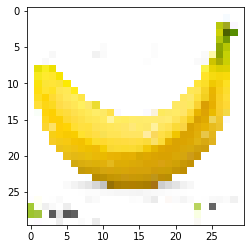

banana_79.jpg is banana


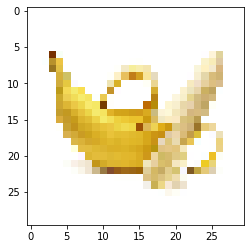

banana_82.jpg is banana


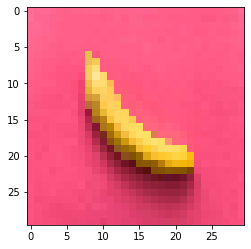

banana_88.jpg is apple


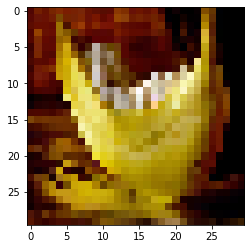

banana_83.jpg is banana


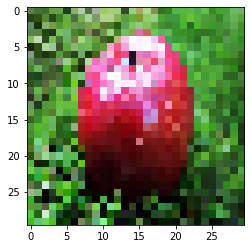

apple_91.jpg is apple


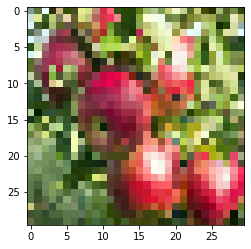

apple_77.jpg is apple


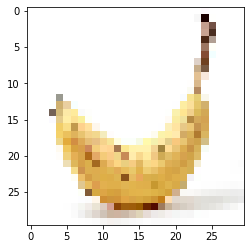

banana_84.jpg is banana


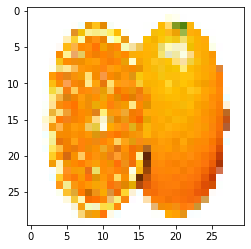

orange_78.jpg is orange


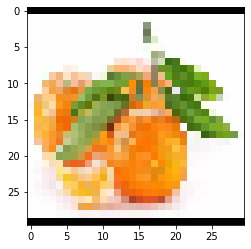

orange_86.jpg is orange


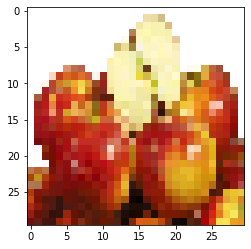

apple_95.jpg is orange


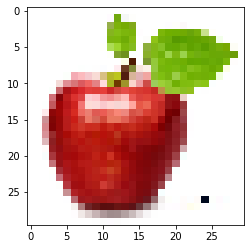

apple_87.jpg is apple


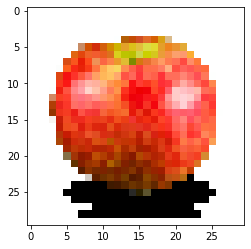

apple_92.jpg is apple


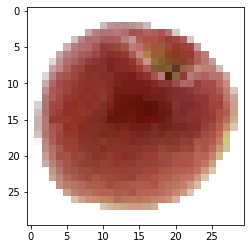

apple_90.jpg is apple


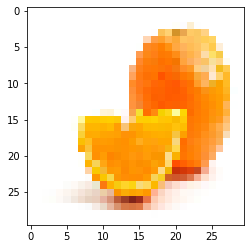

orange_92.jpg is orange


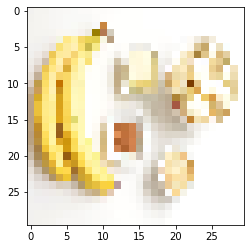

banana_91.jpg is banana


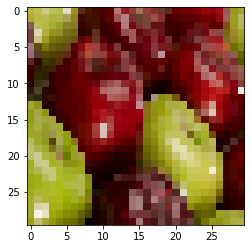

apple_84.jpg is apple


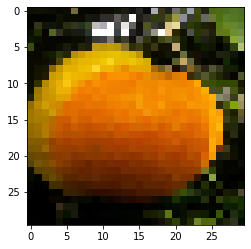

orange_85.jpg is orange


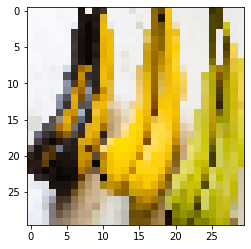

banana_87.jpg is banana


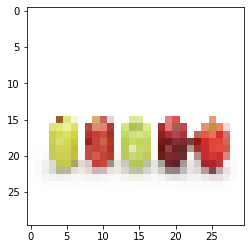

apple_86.jpg is banana


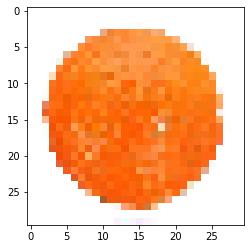

orange_83.jpg is orange


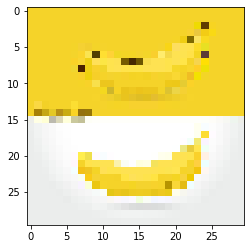

banana_93.jpg is banana


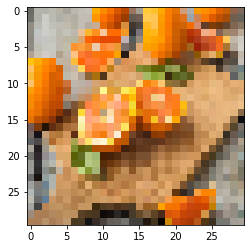

orange_77.jpg is banana


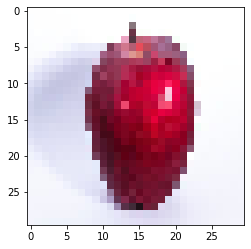

apple_93.jpg is apple


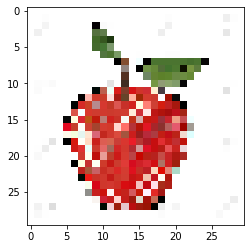

apple_88.jpg is apple


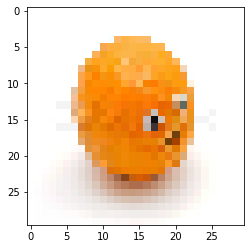

orange_91.jpg is orange


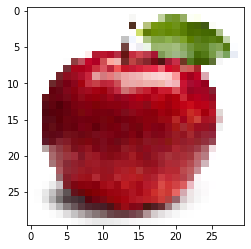

apple_89.jpg is apple


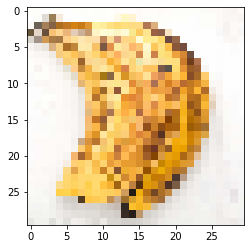

banana_86.jpg is orange


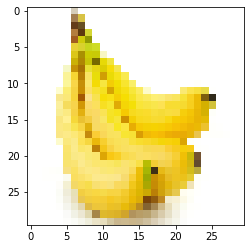

banana_90.jpg is banana


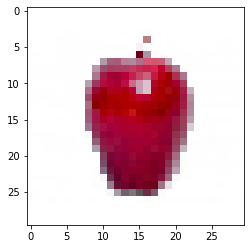

apple_80.jpg is apple


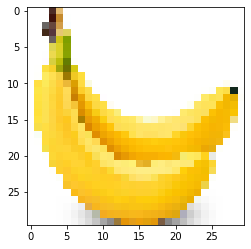

banana_81.jpg is banana


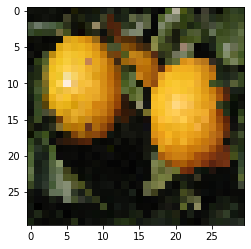

orange_89.jpg is orange


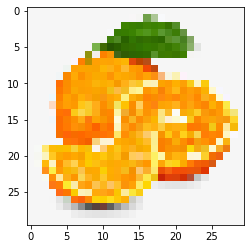

orange_82.jpg is orange


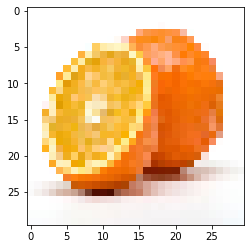

orange_84.jpg is orange


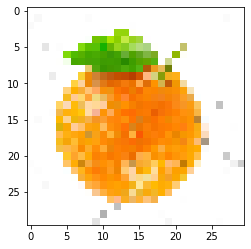

orange_95.jpg is orange


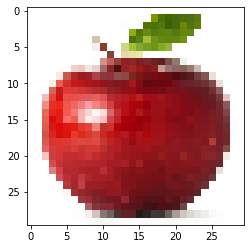

apple_81.jpg is apple


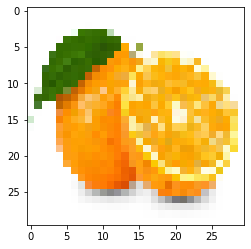

orange_80.jpg is orange


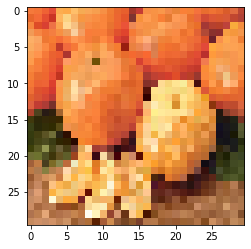

orange_90.jpg is banana


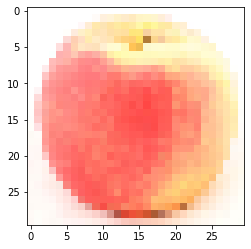

apple_78.jpg is apple


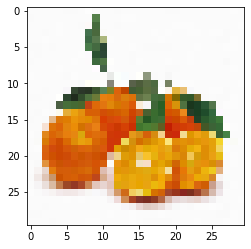

orange_87.jpg is orange


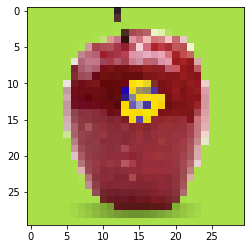

apple_85.jpg is apple


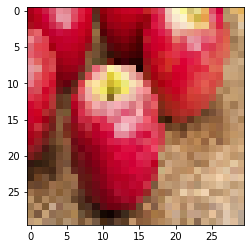

apple_94.jpg is apple


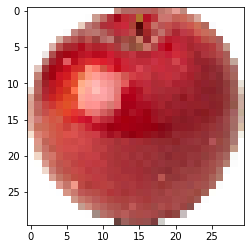

apple_83.jpg is apple


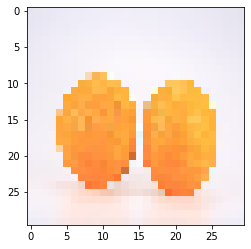

orange_93.jpg is orange


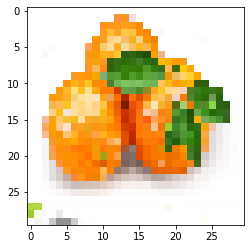

orange_81.jpg is orange


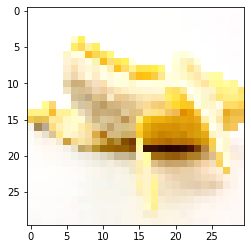

banana_85.jpg is banana


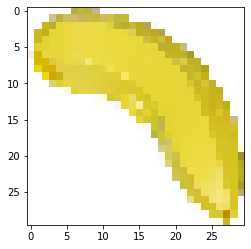

banana_94.jpg is banana


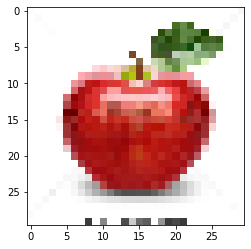

apple_82.jpg is apple


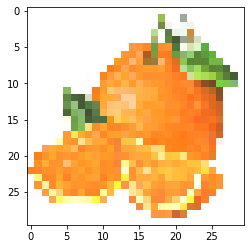

orange_94.jpg is orange


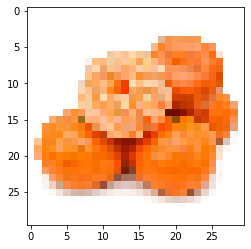

orange_79.jpg is orange


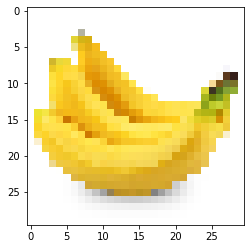

banana_89.jpg is orange


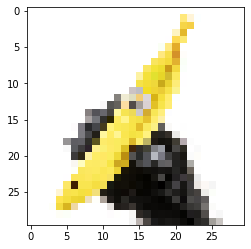

banana_77.jpg is banana


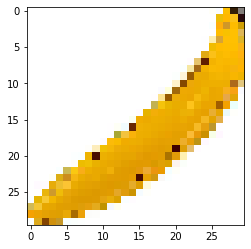

banana_92.jpg is banana


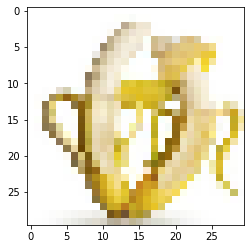

banana_78.jpg is banana


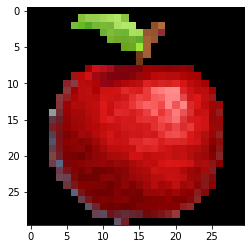

apple_79.jpg is apple


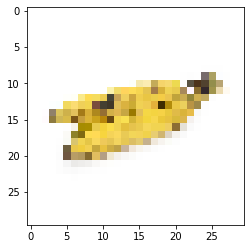

banana_80.jpg is banana
Accuracy of test set is 0.873


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
import os 
import PIL

dir_path= 'test/'

data = np.asarray(['apple','banana','mixed','orange'])
new_array= np.zeros((1,4))
#instantiates an empty numpy array
total = len(os.listdir(dir_path))
count = 0

for filename in os.listdir(dir_path):
    img = image.load_img(dir_path + filename, target_size=(30,30))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_batch)
    pred = prediction[0]
    
    idx, = np.where(pred==max(pred))
    #
    # Recording test set as 2D array
    new_array = np.vstack([new_array,pred])
    
    # Display + keep track of no. of correct predictions
    if len(idx) >1:
        plot.imshow(img)
        plot.show()
        print(f"{filename:s} is unknown by model, error in prediction")
    else:
        j = idx[0]
        plot.imshow(img)
        plot.show()
        print(f"{filename:s} is {data[j]}")
        if data[j] in filename:
            count += 1
        
print(f"Accuracy of test set is {count/total:0.3f}")
# print(new_array)

In [ ]:
from zipfile import ZipFile
file_name = 'test.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done extracting test.zip')

Done extracting test.zip


In [ ]:
data=[]
data1=[]
for i in range(77,96):
    img=Image.open("test/apple_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("apple")
for i in range(77,95):
    img=Image.open("test/banana_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("banana")

for i in range(77,88):
    img=Image.open("test/orange_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("orange")
for i in range(89,96):
    img=Image.open("test/orange_{0}.jpg".format (i)).convert("RGB")
    img_re=img.resize((30,30))
    array = np.array(img_re)
    data.append(array)
    data1.append("orange")
feature=np.array(data)
label=np.array(data1)

In [ ]:
x_test=np.reshape(feature,(feature.shape[0],30,30,3))
x_test=x_test/255

In [ ]:
encoder=LabelEncoder()
encoder.fit(label)
labels=encoder.transform(label)
y_test=tf.keras.utils.to_categorical(labels)

In [ ]:
loss, accuracy=model.evaluate(x=x_test, y=y_test)

2/2 [==============================] - 0s 27ms/step - loss: 0.7420 - accuracy: 0.8667


In [ ]:
print(loss,accuracy)

0.7420070171356201 0.8666666746139526


## **Model 2b: Adam and RMSprop optimization algorithms; 200 x 200 px**

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense

In [ ]:
categories =['apple','banana','mixed','orange']

def process_img(file,numlist,features,label):
    for category in categories:
        
        for i in numlist:
            try:
                img= Image.open('%s/%s_%d.jpg' % (file,category,i)).convert('RGB')
                img=img.resize((200,200))
                img_array=np.array(img)
                features.append(img_array)
                label.append(category)
                       
            except Exception as e:
                pass
        
        continue   

In [ ]:
#set up train & test data
x_train=[]
y_train=[]
x_test=[]
y_test=[]

process_img('train1',range(1,77),x_train,y_train)
process_img('test',range(21,96),x_test,y_test) 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
#convert to numpy array
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],200,200,3))
x_test=np.reshape(x_test,(x_test.shape[0],200,200,3))


x_train=x_train/255
x_test=x_test/255

In [ ]:
#one-hot encoding
encoder=LabelEncoder()
train=encoder.fit_transform(y_train)
test=encoder.fit_transform(y_test)

y_train=tf.keras.utils.to_categorical(train,4)
y_test=tf.keras.utils.to_categorical(test,4)

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 198, 198, 64)      1792      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 196, 196, 32)      18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 307328)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               39338112  
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)              

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

#Actual accuracy of test set is 0.945

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 198, 198, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 196, 196, 32)      18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 307328)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               39338112  
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [ ]:
model.fit(x_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
7/7 [==============================] - 41s 6s/step - loss: 22.1578 - accuracy: 0.2870 - val_loss: 1.2297 - val_accuracy: 0.6667
Epoch 2/30
7/7 [==============================] - 39s 6s/step - loss: 1.3141 - accuracy: 0.3935 - val_loss: 1.0759 - val_accuracy: 0.5000
Epoch 3/30
7/7 [==============================] - 39s 6s/step - loss: 1.1933 - accuracy: 0.5741 - val_loss: 2.9888 - val_accuracy: 0.0000e+00
Epoch 4/30
7/7 [==============================] - 39s 6s/step - loss: 1.3289 - accuracy: 0.5741 - val_loss: 8.2266 - val_accuracy: 0.0000e+00
Epoch 5/30
7/7 [==============================] - 39s 6s/step - loss: 1.2484 - accuracy: 0.6435 - val_loss: 0.7581 - val_accuracy: 0.8750
Epoch 6/30
7/7 [==============================] - 39s 6s/step - loss: 0.8748 - accuracy: 0.7176 - val_loss: 2.4010 - val_accuracy: 0.5000
Epoch 7/30
7/7 [==============================] - 39s 6s/step - loss: 1.7339 - accuracy: 0.6343 - val_loss: 1.2332 - val_accuracy: 0.6250
Epoch 8/30
7/7 [=========

In [ ]:
score=model.evaluate(x_test,y_test)
print('score=',score)

2/2 [==============================] - 2s 1s/step - loss: 1.0362 - accuracy: 0.8000
score= [1.0362112522125244, 0.800000011920929]


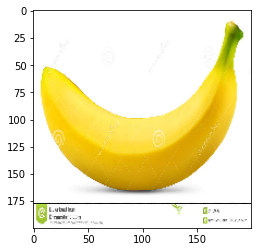

banana_79.jpg is banana


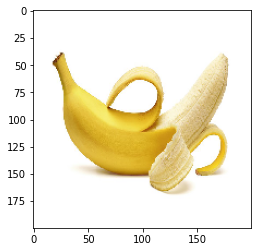

banana_82.jpg is banana


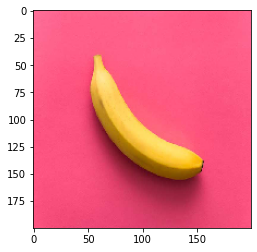

banana_88.jpg is apple


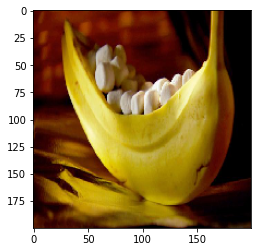

banana_83.jpg is banana


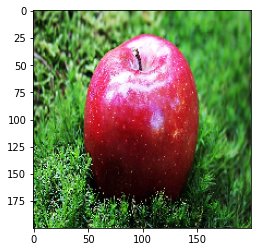

apple_91.jpg is apple


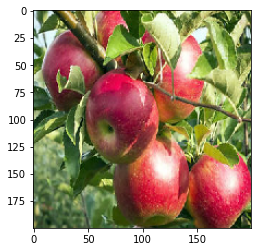

apple_77.jpg is apple


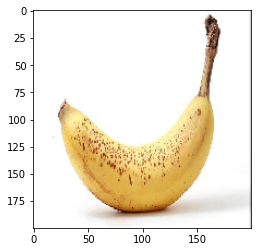

banana_84.jpg is banana


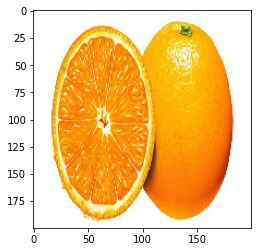

orange_78.jpg is orange


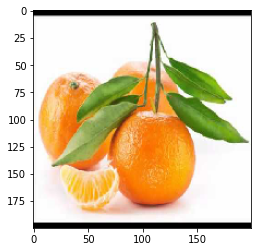

orange_86.jpg is banana


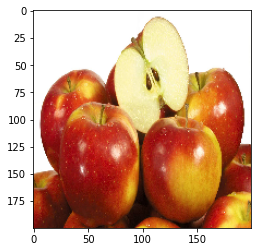

apple_95.jpg is apple


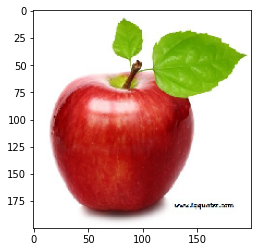

apple_87.jpg is apple


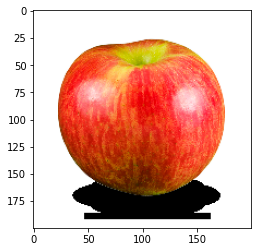

apple_92.jpg is apple


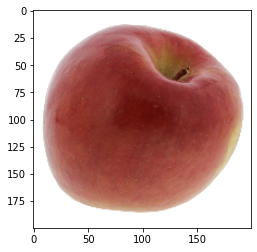

apple_90.jpg is apple


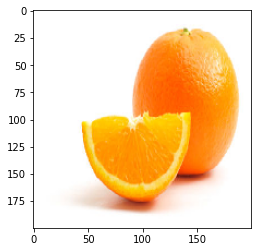

orange_92.jpg is orange


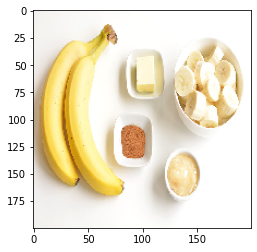

banana_91.jpg is banana


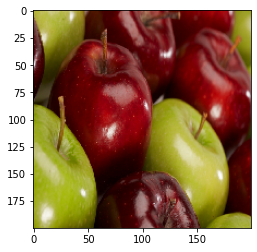

apple_84.jpg is apple


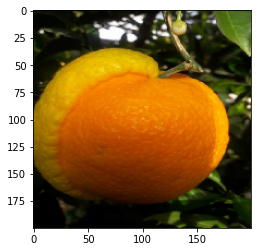

orange_85.jpg is orange


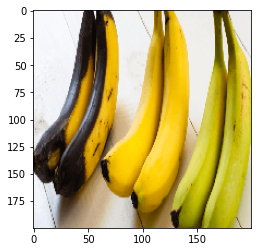

banana_87.jpg is banana


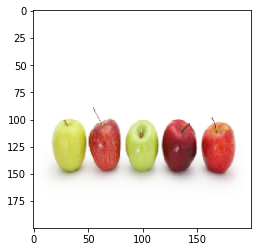

apple_86.jpg is apple


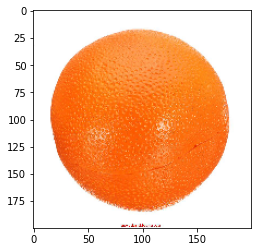

orange_83.jpg is orange


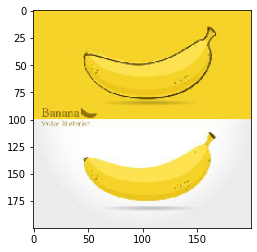

banana_93.jpg is banana


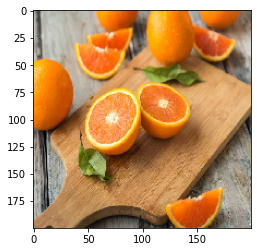

orange_77.jpg is banana


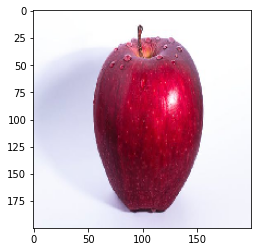

apple_93.jpg is apple


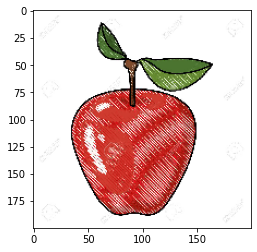

apple_88.jpg is apple


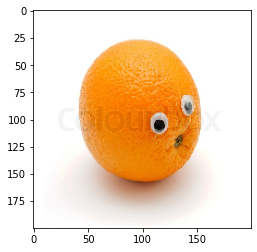

orange_91.jpg is orange


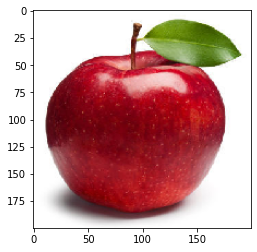

apple_89.jpg is apple


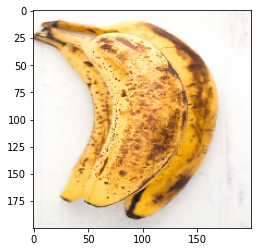

banana_86.jpg is banana


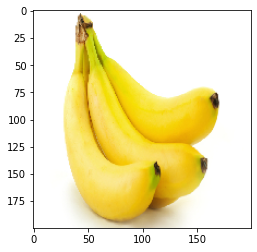

banana_90.jpg is banana


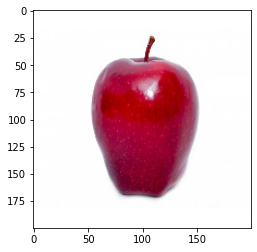

apple_80.jpg is apple


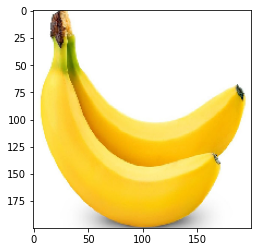

banana_81.jpg is banana


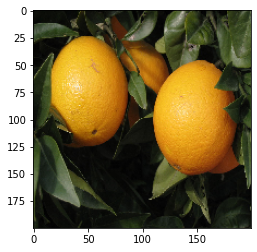

orange_89.jpg is orange


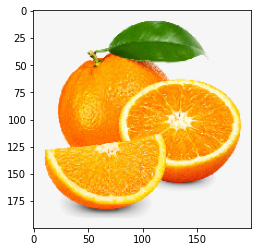

orange_82.jpg is orange


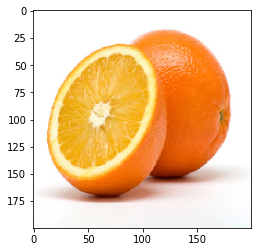

orange_84.jpg is orange


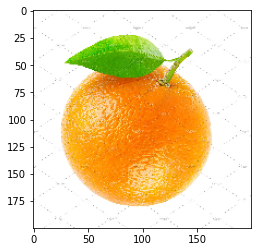

orange_95.jpg is orange


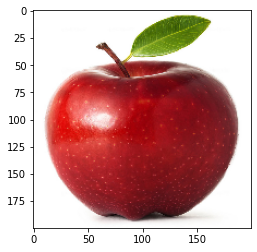

apple_81.jpg is apple


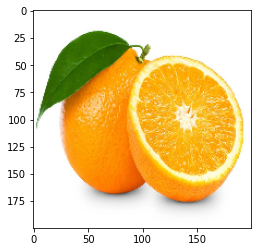

orange_80.jpg is orange


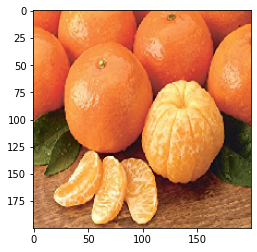

orange_90.jpg is orange


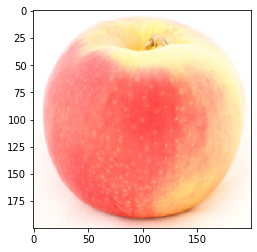

apple_78.jpg is apple


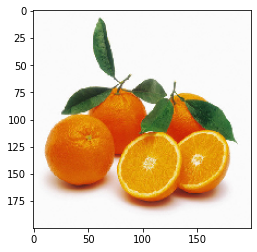

orange_87.jpg is orange


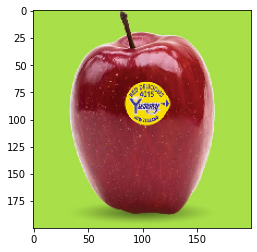

apple_85.jpg is apple


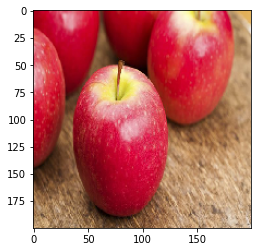

apple_94.jpg is apple


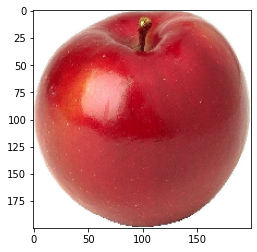

apple_83.jpg is apple


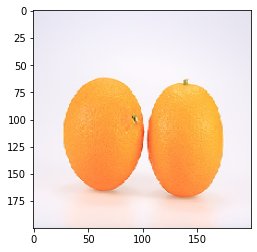

orange_93.jpg is orange


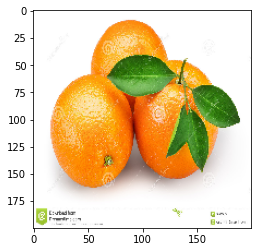

orange_81.jpg is orange


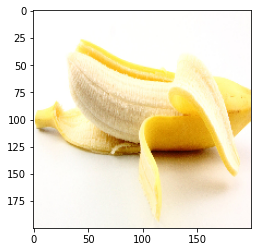

banana_85.jpg is banana


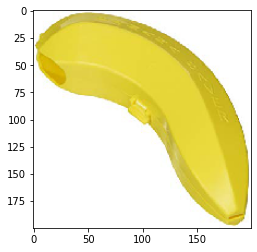

banana_94.jpg is banana


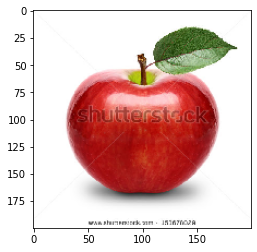

apple_82.jpg is apple


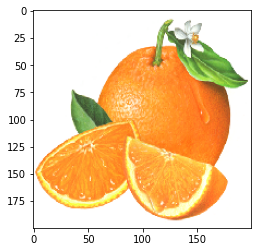

orange_94.jpg is orange


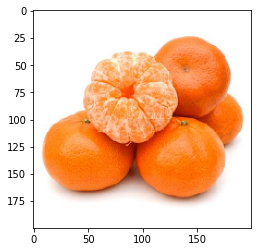

orange_79.jpg is orange


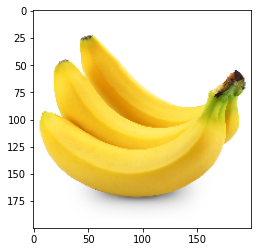

banana_89.jpg is banana


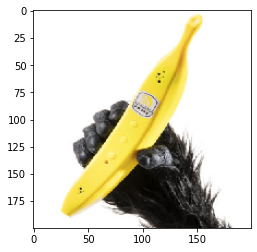

banana_77.jpg is banana


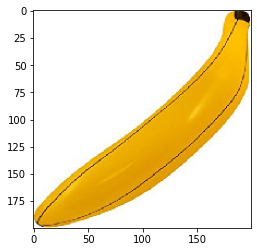

banana_92.jpg is banana


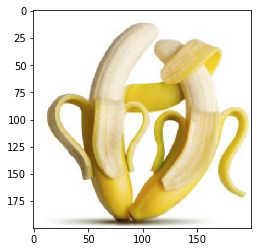

banana_78.jpg is banana


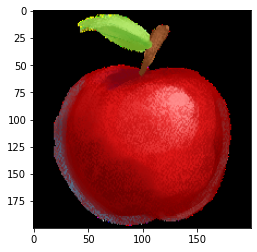

apple_79.jpg is apple


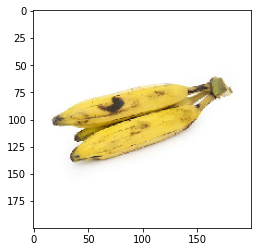

banana_80.jpg is banana
Accuracy of test set is 0.945


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
import os 
import PIL

dir_path= 'test/'

data = np.asarray(['apple','banana','mixed','orange'])
new_array= np.zeros((1,4))
#instantiates an empty numpy array
total = len(os.listdir(dir_path))
count = 0

for filename in os.listdir(dir_path):
    img = image.load_img(dir_path + filename, target_size=(200,200))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_batch)
    pred = prediction[0]
    
    idx, = np.where(pred==max(pred))
    #
    # Recording test set as 2D array
    new_array = np.vstack([new_array,pred])
    
    # Display + keep track of no. of correct predictions
    if len(idx) >1:
        plot.imshow(img)
        plot.show()
        print(f"{filename:s} is unknown by model, error in prediction")
    else:
        j = idx[0]
        plot.imshow(img)
        plot.show()
        print(f"{filename:s} is {data[j]}")
        if data[j] in filename:
            count += 1
        
print(f"Accuracy of test set is {count/total:0.3f}")
# print(new_array)